In [1]:
from __future__ import division
import pandas as pd
import numpy as np
#import scipy as sp
#import scipy.stats as ss
%matplotlib inline 
import matplotlib.pyplot as plt

#### Reading data

In [2]:
"""Read train and test data """
train_data = pd.read_csv('ex3_train.csv')
test_data = pd.read_csv('ex3_test.csv')

"""x and y of train data"""
X_train_df = train_data.iloc[:,0:-1]
Y_train_df = pd.DataFrame(train_data.y)


"""x and y of test data"""
X_test_df = test_data.iloc[:,0:-1]
Y_test_df = pd.DataFrame(test_data.y)

In [3]:
"""Convert train x and y into matrices"""
x_train = np.array(X_train_df)  
y_train = np.array(Y_train_df)  


"""Convert test x and y into matrices"""
x_test = np.array(X_test_df)  
y_test = np.array(Y_test_df)  


#### Initializing parameters

In [4]:
"""initializin weights and bias (w1, w2, b1, b2) function return weights and biases"""

def initalize_parameters():

    np.random.seed(1)
    """weights"""
    W_first = 0.01 * np.random.randn(25, 400)  
    W_second = 0.01 * np.random.randn(10, 25)  
    """bias"""
    bias1 = np.zeros((25, 1)) 
    bias2 = np.zeros((10, 1)) 
    
    
    return W_first, W_second, bias1, bias2

#### One Hot Encoding

In [5]:
"""Function for One hot encoding. input Y as an array and no.of samples is passed to the function"""

def One_Hot_Encoding(arr, samples_num):
    encode_matrix = np.zeros((samples_num, 10))
    for i in range(samples_num):
        encode_matrix[i][arr[i][0]] = 1
    return encode_matrix

#### Sigmoid calculation

In [6]:
def sigmoid(z):
    
    """ sigmoid function when an array is passed as parameter"""
    
    return 1/(1 + np.exp(-z))   
    

In [7]:
def before_sigmoid(W, X, b):
    
    """ calculating Z = XW + b in matrix form and returning Z"""
    
    xw = np.dot(X, W.T)  
    
    xwplusb = np.add(xw.T, b) 
    return xwplusb   
    

#### Forward propagation

In [8]:
def forwardpropagation(W1, W2, A, b1, b2):
    
    """ performing forward propagation. returns new neurons and Zs"""

    part1 = np.dot(A, W1.T)      
    Z1 = np.add(part1.T,b1)     
    A1 = sigmoid(Z1)            
    
    part2 = np.dot(W2,A1) 
    Z2 = np.add(part2,b2)       
    A2 = sigmoid(Z2)           
    A2 = A2.T                   

     
    return A1, A2, Z1, Z2
         

#### function for sigmoid prime

In [9]:
def dSigmoid(A):
    
    "derivative of sigmoid function or sigmoid prime"

    return np.multiply(A, (1 - A))


#### Backward prropagation

In [10]:
""" calcualte one-hot-encoding and pass the result as Y . after forward propagation pass A1, A2"""

def backwardpropagation(A1, A2, Z1, Y, X):
    
    """ backward propagation function. the function ouputs gradient of weights and bias"""
    
    m = 3500
    dZ2 = A2 - Y   
    #print(dZ2.shape)
    dW2 = (1/m) * np.dot(dZ2.T, A1.T) 
    db2 = (1/m) * np.sum(dZ2.T, axis=1, keepdims = True) 
    gdashZ1 = dSigmoid(A1)  
    dZ1_firstpart = np.dot(dZ2, W2) 
    dZ1 = np.multiply(dZ1_firstpart.T, gdashZ1) 
    dW1 = (1/m) * np.dot(dZ1, X) 
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims = True) 
        
    return dW1, dW2, db1, db2
    

#### gradient descent

In [11]:
def gradientDescent(dW1, dW2, db1, db2, B1, B2, W1, W2, alpha):
    
    
    """ gradient descent calcualtes new weights and bais"""

    
    w2 = W2 - alpha * dW2
    w1 = W1 - alpha * dW1
    b1 = B1 - alpha * db1
    b2 = B2 - alpha * db2
    
    return w1, w2, b1, b2 

#### loss function

In [12]:
def lossFunction(y_en, final_A):
    
    """ calculating loss functions - y (is given data Y) and y1(is A2) are arrays """
    import math
    loss = (-1) * np.sum(np.multiply(y_en, np.log(final_A)) + np.multiply(1 - y_en, np.log(1 - final_A)))
    
    return loss/3500

#### Softmax

In [13]:
def softmax(x):
    
    """ softmax function final A2 is passed as parameter (e power x) / sum(e power x)"""
    deno =  np.sum(np.exp(x), axis=1, keepdims=True)
    deno = deno.reshape(deno.shape[0],1)
    probs = np.exp(x) / deno
    return probs

#### main code calcualting for one alpha and one iteration value

In [416]:
"""the 35000 , 10000 iterations for alpha 1 produce the same output in test. so redoing just for one loop""" 
""" I took me 2 minutes to run the below function"""

In [15]:
alpha = 1

"""initialising parameters"""
#cost_alliter = []
W1_initial, W2_initial, bias1_initial, bias2_initial  = initalize_parameters()

""" assigning the weights and bias"""

B1 = bias1_initial
B2 = bias2_initial
W1 = W1_initial
W2 = W2_initial

"""one hot encoding - applying on given Y"""

Y_en = One_Hot_Encoding(y_train, 3500)

""" iterations loop """
for i in range(0, 10000):
    
    A1, A2, Z1, Z2 = forwardpropagation(W1, W2, x_train, B1, B2)
    
    dW1, dW2, db1, db2 = backwardpropagation(A1, A2, Z1, Y_en, x_train)

    w1, w2, b1, b2 = gradientDescent(dW1, dW2, db1, db2, B1, B2, W1, W2, alpha)
    
    B1 = b1
    B2 = b2
    W1 = w1
    W2 = w2
        
hiddenW = W1
outputW = W2
finalB1 = B1
finalB2 = B2

In [16]:
"""calculating training loss after optimization"""

train_loss = lossFunction(Y_en, A2)
print("loss in training set after optimization %s " %train_loss)

loss in training set after optimization 0.0213554982745 


In [17]:
""" calcualting softmax for A2"""

probabilities = softmax(A2)

"""predicting Y after optimization for train set"""
y_train_predict = np.argmax(probabilities, axis=1)
y_train_predfinal = y_train_predict.reshape(probabilities.shape[0],1) # just reshaping the output to the input array. 


#### accuaracy calculation

In [18]:
def calc_accuracy(y_pred, y_actual):
    count =0
    for i in range(0, len(y_actual)):
        if(y_pred[i] == y_actual[i]):
            count += 1
    return (count/len(y_pred))*100

In [19]:
"""train accuracy calcualtion"""

train_accuracy = calc_accuracy(y_train_predfinal, y_train)
print("Accuracy of output prediction on training set is %s " %train_accuracy)

Accuracy of output prediction on training set is 100.0 


#### Test data

In [20]:
"""forward propagation for test data"""
test_A1, test_A2, test_Z1, test_Z2 = forwardpropagation(hiddenW, outputW, x_test, finalB1, finalB2)

"""softmax on test data"""
probabilities_test = softmax(test_A2)

y_test_predict = np.argmax(probabilities_test, axis=1)
y_test_predfinal = y_test_predict.reshape(probabilities_test.shape[0],1) # just reshaping the output to the input array.

" test data accuracy calcualtion"
test_accuracy = calc_accuracy(y_test_predfinal, y_test)
print("Accuracy of output prediction on test set is %s " %test_accuracy)

Accuracy of output prediction on test set is 92.4 


## Code for plotting graph

In [ ]:
###"""the below function is taking 8 minutes approximately for me to run"""

In [22]:
#alpha = 1
iterations = [1000, 5000, 10000]
alphas = [1, 0.01, 0.0001]
"""initialising parameters"""
cost_all_alpha = []
W1_initial, W2_initial, bias1_initial, bias2_initial  = initalize_parameters()

""" assigning the weights and bias"""

B1 = bias1_initial
B2 = bias2_initial
W1 = W1_initial
W2 = W2_initial

"""one hot encoding - applying on given Y"""

Y_en = One_Hot_Encoding(y_train, 3500)

for alpha in alphas:
    """ iterations loop """
    cost_each_alpha = []
    for iteration in iterations:
        W1, W2, B1, B2  = initalize_parameters()
        
        for i in range(0, iteration):
            A1, A2, Z1, Z2 = forwardpropagation(W1, W2, x_train, B1, B2)
            dW1, dW2, db1, db2 = backwardpropagation(A1, A2, Z1, Y_en, x_train)
            w1, w2, b1, b2 = gradientDescent(dW1, dW2, db1, db2, B1, B2, W1, W2, alpha)
    
            B1 = b1
            B2 = b2
            W1 = w1
            W2 = w2
        loss = lossFunction(Y_en, A2)
        cost_each_alpha.append(loss)
        #print("iteration is %s " %iteration  )
        #print("for alpha %s " %alpha )
    cost_all_alpha.append(cost_each_alpha)
    #len_c = len(cost_all_alpha)
    #print("length of cost_all_alpha %s" %len_c)


#### Cost vs Iterations Plot for alphas(1, 0.1, 0.01, 0.001, 0.0001)

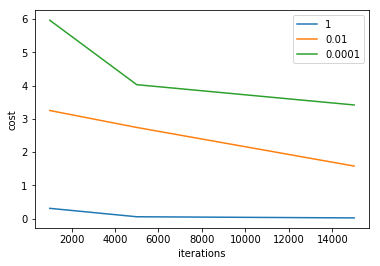

In [23]:
"""plotting cost versus iterations for each aplha"""
#plt.plot([1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000], cost_all_alpha[0], label='1')
##plt.plot([1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000], cost_all_alpha[1], label='0.1')
#plt.plot( [1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000], cost_all_alpha[2], label='0.01')
#plt.plot( [1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000], cost_all_alpha[3], label='0.001')
#plt.plot( [1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000], cost_all_alpha[4], label='0.0001')
plt.plot([1000, 5000, 15000], cost_all_alpha[0], label='1')
plt.plot([1000, 5000, 15000], cost_all_alpha[1], label='0.01')
plt.plot([1000, 5000, 15000], cost_all_alpha[2], label='0.0001')
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()